In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data_dict = dict()

In [33]:
# values from Table k=2

data_dict["k=1"] = {
        "nested circles":      [0.715, 0.693],
        "nested spheres":      [0.714, 0.736],
        "alternate stripes":   [0.517, 0.596],
        "wine-dataset":        [0.364, 0.448],
        "heart-statlog":       [0.241, 0.268],
        "ionosphere":          [0.238, 0.325],
        "breast-cancer":       [0.231, 0.245],
        "credit-g":            [0.119, 0.153],
    }

data_dict["k=2"] = {
        "wine-dataset":        [0.544, 0.620],
        "heart-statlog":       [0.345, 0.381],
        "ionosphere":          [0.399, 0.543],
        "breast-cancer":       [0.375, 0.418],
        "credit-g":            [0.210, 0.253],
    }

In [34]:
for keys, data in data_dict.items():

    print(f"Computing for \n{keys}:\n")

    datasets = list(data.keys())
    A = np.array(list(data.values()))

    lambda_total  = A[:, 0]
    lambda_partial = A[:, 1]

    n_features = {
        "nested circles":    2,
        "nested spheres":    3,
        "alternate stripes": 2,
        "wine-dataset":      14,
        "heart-statlog":     13,
        "ionosphere":        34,
        "breast-cancer":     9,
        "credit-g":          20,
    }

    # COMPUTE % DIFFERENCES FOR ALL FOUR COLUMNS
    def percent_diff(a, b):
        """Return % difference (a - b)/b * 100."""
        return (a - b) / b * 100

    x_values = [n_features[d] for d in datasets]
    y_partial_to_total = percent_diff(lambda_partial, lambda_total)

    # print("k=1 OVER N:", one_over_n)
    print("y_partial_to_pca:", y_partial_to_total)
    print("x values:", x_values)

    print(np.corrcoef(y_partial_to_total, np.array(list(x_values))))

Computing for 
k=1:

y_partial_to_pca: [-3.07692308  3.08123249 15.28046422 23.07692308 11.2033195  36.55462185
  6.06060606 28.57142857]
x values: [2, 3, 2, 14, 13, 34, 9, 20]
[[1.         0.87425899]
 [0.87425899 1.        ]]
Computing for 
k=2:

y_partial_to_pca: [13.97058824 10.43478261 36.09022556 11.46666667 20.47619048]
x values: [14, 13, 34, 9, 20]
[[1.         0.98378997]
 [0.98378997 1.        ]]


array([[1.        , 0.87425899],
       [0.87425899, 1.        ]])

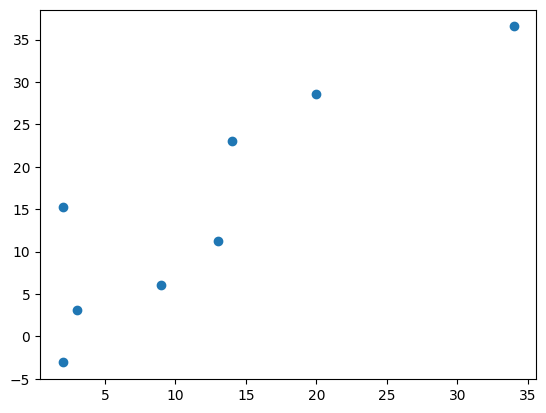

In [28]:
plt.plot()
plt.scatter(x_values, y_partial_to_total)
plt.show()